Importing libraries and modules

In [55]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

Importing dataset

In [56]:
df = pd.read_csv('H2.csv')

Inspecting the dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [69]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Country,MarketSegment,...,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,...,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,6.556473,0.795185,2.182957,1.850977,0.091365,0.004941,6.743414,1.377751,...,0.851002,0.187369,0.162713,25.260003,6.755414,3.226774,0.287558,105.304465,0.024367,0.546918
std,0.493111,110.948526,3.042898,0.885026,1.456416,0.509292,0.372168,0.084323,13.525431,1.293677,...,1.470098,0.608620,0.369788,54.139157,40.033529,20.870890,0.533871,43.602954,0.154919,0.780776
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,6.000000,2.000000,...,2.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,12.000000,16.000000,41.000000,4.000000,3.000000,10.000000,166.000000,7.000000,...,8.000000,21.000000,2.000000,509.000000,497.000000,391.000000,3.000000,5400.000000,3.000000,5.000000


In [58]:
#pd.set_option('display.max_columns', None)
print(df.head())

   IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType Agent  \
0                  2       1       0.0  ...  No Deposit          6   
1                  4       2       0.0  ...  No Deposi

Preprocess input data

In [59]:
#Dropping columns that does not have significance in predicting hotel booking cancellation
df.drop('ArrivalDateYear', axis=1, inplace=True)
df.drop('ArrivalDateWeekNumber', axis=1, inplace=True)
df.drop('ArrivalDateDayOfMonth', axis=1, inplace=True)

#Converting text values in ArrivalDateMonth column to numeric values
month_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }
df["ArrivalDateMonth"] = df["ArrivalDateMonth"].apply(lambda x: month_dict.get(x))

#Converting Children column to integer
df['Children'] = df['Children'].fillna(0)
df["Children"] = df["Children"].astype(int)

#Converting text values in Meal column to numeric values
df['Meal'] = df['Meal'].str.strip()
df['Meal'].mask(df['Meal'] == 'SC', 0, inplace=True)
df['Meal'].mask(df['Meal'] == 'BB', 1, inplace=True)
df['Meal'].mask(df['Meal'] == 'HB', 2, inplace=True)
df['Meal'].mask(df['Meal'] == 'FB', 3, inplace=True)

#Converting text values in Country column to numeric values
country_dict = dict.fromkeys(df.Country.unique())
country_dict = dict(zip(country_dict, range(0,len(df.Country.unique()))))
df["Country"] = df["Country"].apply(lambda x: country_dict.get(x))

#Converting text values in MarketSegment column to numeric values
market_segment_dict = dict.fromkeys(df.MarketSegment.unique())
market_segment_dict = dict(zip(market_segment_dict, range(0,len(df.MarketSegment.unique()))))
df["MarketSegment"] = df["MarketSegment"].apply(lambda x: market_segment_dict.get(x))

#Converting text values in DistributionChannel column to numeric values
distribution_channel_dict = dict.fromkeys(df.DistributionChannel.unique())
distribution_channel_dict = dict(zip(distribution_channel_dict, range(0,len(df.DistributionChannel.unique()))))
df["DistributionChannel"] = df["DistributionChannel"].apply(lambda x: distribution_channel_dict.get(x))

#Converting text values in ReservedRoomType column to numeric values
df['ReservedRoomType'] = df['ReservedRoomType'].str.strip()
reserved_room_type_dict = dict.fromkeys(df.ReservedRoomType.unique())
reserved_room_type_dict = dict(zip(reserved_room_type_dict, range(0,len(df.ReservedRoomType.unique()))))
df["ReservedRoomType"] = df["ReservedRoomType"].apply(lambda x: reserved_room_type_dict.get(x))

#Converting text values in AssignedRoomType column to numeric values
df['AssignedRoomType'] = df['AssignedRoomType'].str.strip()
assigned_room_type_dict = dict.fromkeys(df.AssignedRoomType.unique())
assigned_room_type_dict = dict(zip(assigned_room_type_dict, range(0,len(df.AssignedRoomType.unique()))))
df["AssignedRoomType"] = df["AssignedRoomType"].apply(lambda x: assigned_room_type_dict.get(x))

#Converting text values in DepositType column to numeric values
df['DepositType'] = df['DepositType'].str.strip()
deposit_type_dict = dict.fromkeys(df.DepositType.unique())
deposit_type_dict = dict(zip(deposit_type_dict, range(0,len(df.DepositType.unique()))))
df["DepositType"] = df["DepositType"].apply(lambda x: deposit_type_dict.get(x))

#Replacing '       NULL' value in Agent column to 0 
df['Agent'] = df.Agent.apply(lambda a: 0 if a == '       NULL' else a)
#Converting Agent column to integer
df['Agent'] = df['Agent'].astype(int)
#Replacing '       NULL' value in Company column to 0
df['Company'] = df.Company.apply(lambda c: 0 if c == '       NULL' else c)
#Converting Company column to integer
df['Company'] = df['Company'].astype(int)

#Converting text values in CustomerType column to numeric values
customer_type_dict = dict.fromkeys(df.CustomerType.unique())
customer_type_dict = dict(zip(customer_type_dict, range(0,len(df.CustomerType.unique()))))
df["CustomerType"] = df["CustomerType"].apply(lambda x: customer_type_dict.get(x))

#Converting text values in ReservationStatus column to numeric values
reservation_status_dict = dict.fromkeys(df.ReservationStatus.unique())
reservation_status_dict = dict(zip(reservation_status_dict, range(0,len(df.ReservationStatus.unique()))))
df["ReservationStatus"] = df["ReservationStatus"].apply(lambda x: reservation_status_dict.get(x))

#Dropping ReservationStatus column
df.drop('ReservationStatus', axis=1, inplace=True)

#Dropping ReservationStatusDate column 
df.drop('ReservationStatusDate', axis=1, inplace=True)

In [60]:
#pd.set_option('display.max_columns', None)
print(df.head())

   IsCanceled  LeadTime  ArrivalDateMonth  StaysInWeekendNights  \
0           0         6                 7                     0   
1           1        88                 7                     0   
2           1        65                 7                     0   
3           1        92                 7                     2   
4           1       100                 7                     0   

   StaysInWeekNights  Adults  Children  Babies Meal  Country  ...  \
0                  2       1         0       0    2        0  ...   
1                  4       2         0       0    1        0  ...   
2                  4       1         0       0    1        0  ...   
3                  4       2         0       0    1        0  ...   
4                  2       2         0       0    1        0  ...   

   AssignedRoomType  BookingChanges  DepositType  Agent  Company  \
0                 0               0            0      6        0   
1                 0               0           

Splitting the dataset into input features (X) and output (y)

In [61]:
X = df.drop('IsCanceled', axis=1)
y = df['IsCanceled']

Normalizing the input features

In [62]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

Splitting dataset into training and testing sets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63464, 25)
(63464,)
(15866, 25)
(15866,)


Defining model architecture

In [65]:
model = Sequential() 
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compiling model

In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Defining Model Checkpoint

In [67]:
checkpoint_filepath = 'model.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    save_weights_only=False, 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True)

Fitting model on training data

In [68]:
history = model.fit(X_train, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint_callback])

Epoch 1/15
1984/1984 [==============================] - 4s 2ms/step - loss: 0.4040 - accuracy: 0.8101 - val_loss: 0.3741 - val_accuracy: 0.8296
Epoch 2/15
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8286 - val_loss: 0.3566 - val_accuracy: 0.8320
Epoch 3/15
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8346 - val_loss: 0.3495 - val_accuracy: 0.8347
Epoch 4/15
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3406 - accuracy: 0.8387 - val_loss: 0.3437 - val_accuracy: 0.8397
Epoch 5/15
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8433 - val_loss: 0.3399 - val_accuracy: 0.8413
Epoch 6/15
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3286 - accuracy: 0.8462 - val_loss: 0.3365 - val_accuracy: 0.8440
Epoch 7/15
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3247 - accuracy: 0.8480 - val_loss: 0.3364 - val_accuracy:

Loading model saved in earlier step

In [49]:
model = load_model(checkpoint_filepath)

Evaluating model on test data

In [50]:
score = model.evaluate(X_test, y_test)

496/496 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8439


In [51]:
score

[0.3329674005508423, 0.8438799977302551]

Visualizing Accuracy and Loss

In [52]:
import matplotlib.pyplot as plt

Plotting the training and validation accuracy over epochs

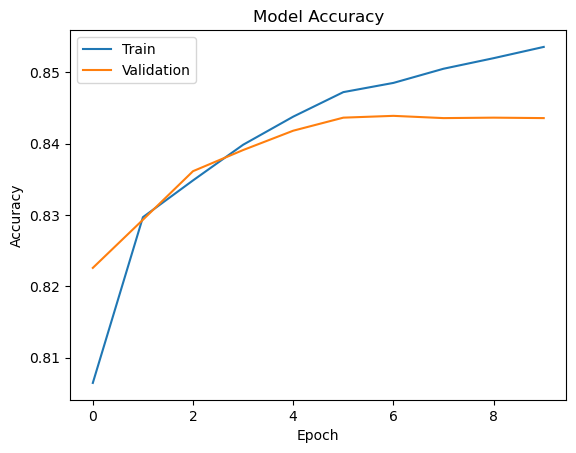

In [53]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Plotting the training and validation loss over epochs

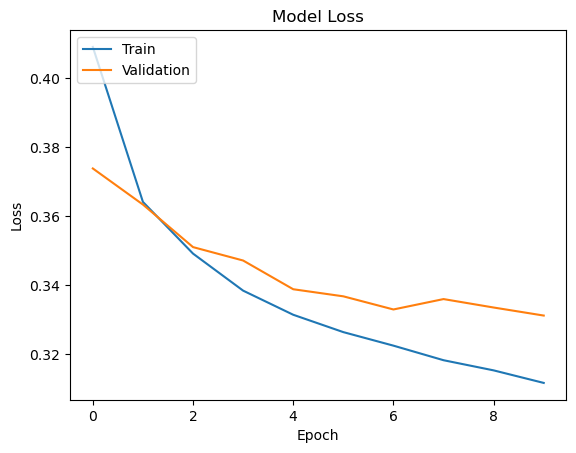

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()